# BRFSS (Behavioral Risk Factor Surveillance System) EDA

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

In [3]:
brfss = pd.read_hdf('data/brfss.hdf5', 'brfss')

In [4]:
height = brfss['HTM4']
weight = brfss['WTKG3']

Text(0, 0.5, 'Weight in kg')

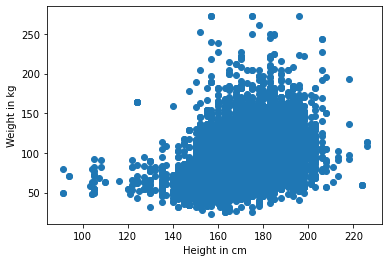

In [5]:
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

This is overplotted so we can try using transparency

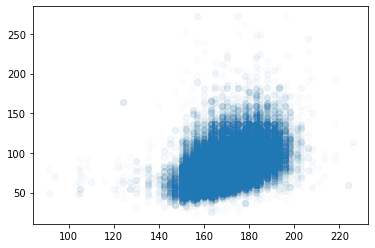

In [6]:
plt.plot(height, weight, 'o', alpha=0.02)

This is STILL overplotted so we can try to make the markers smaller

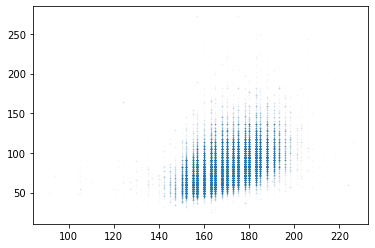

In [7]:
plt.plot(height, weight, 'o', alpha=0.02, markersize=1)

The data is in columns now (probably because it got measured in inches and converted to cm
We can address this by adding random noise to the data - called jittering

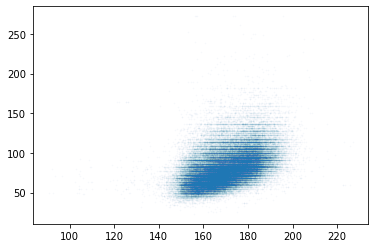

In [8]:
height_jitter = height + np.random.normal(0,2, size=len(brfss))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)

Now we see that weight is also in rows so we add some jitter to the weight 

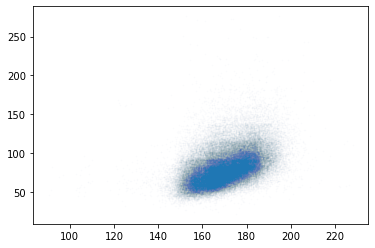

In [11]:
height_jitter = height + np.random.normal(0,2, size=len(brfss))
weight_jitter = weight + np.random.normal(0,2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)

Next we can zoom in on the data by passing parameters to the plotting axis

(140.0, 200.0, 0.0, 200.0)

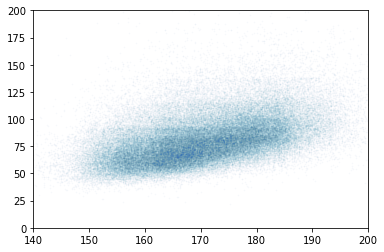

In [15]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 200])

In [14]:
weight_jitter.max()

276.09373998728415

In [17]:
# Eliminate rows where there are NaN values for 'AGE' AND 'WTKG3'
data = brfss.dropna(subset=['AGE','WTKG3'])

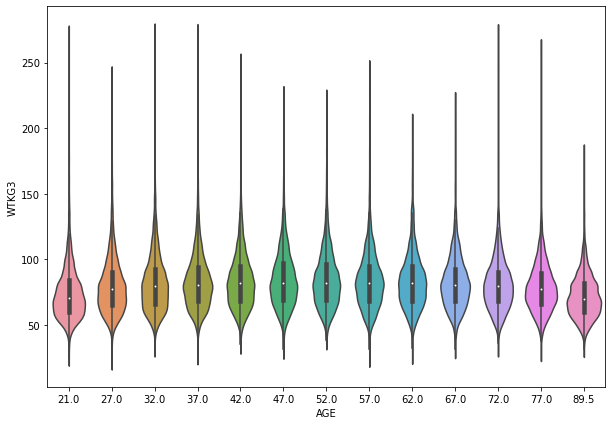

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.violinplot(x='AGE', y='WTKG3', data=data)

<AxesSubplot:xlabel='AGE', ylabel='WTKG3'>

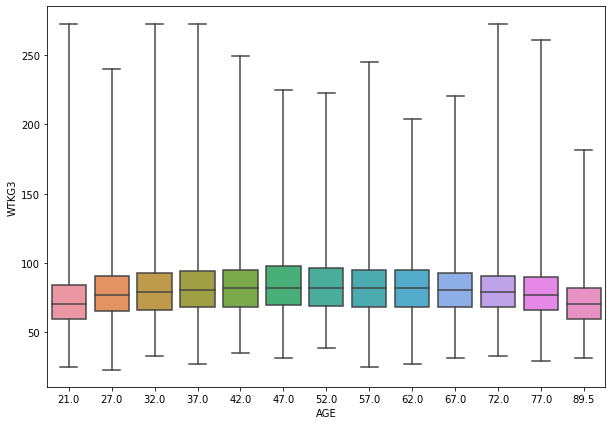

In [24]:
# Viewing the same results as a boxplot
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

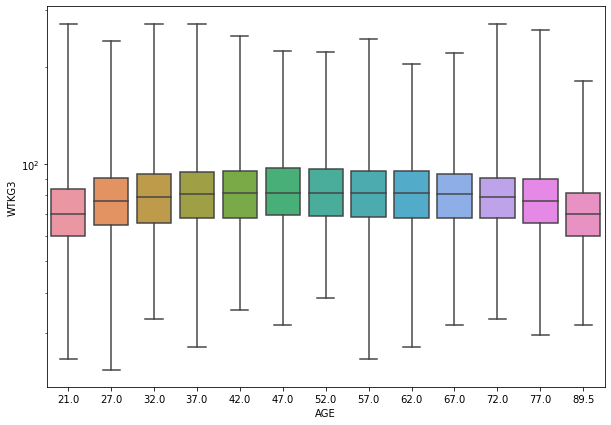

In [25]:
# This data obviously skews toward the higher values of weight so looking at it 
# on a log scale might be beneficial
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')